## Модель реакции Белоусова–Жаботинского


\begin{cases}
\dfrac{dy_1}{dt} = k_1\bigl(y_2 - y_1 y_2 + y_1 - k_2 y_1^2\bigr),\\
\dfrac{dy_2}{dt} = k_3\bigl(-y_2 - y_1 y_2 + y_3\bigr),\\
\dfrac{dy_3}{dt} = k_4\bigl(y_1 - y_3\bigr),
\end{cases}

\begin{aligned}
&y_1(0)=4,\quad y_2(0)=1.1,\quad y_3(0)=4,\\
&k_1=77.27,\quad k_2=8.375\times10^{-6},\quad k_3=\dfrac{1}{77.27},\quad k_4=0.161.
\end{aligned}


# Функции методов и правой части

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

from scipy.integrate import solve_ivp
from time import time

params = {
    'k1': 77.27,
    'k2': 8.375 * 1e-6,
    'k4': 0.161,
}

y0 = [4.0, 1.1, 4.0]
a, b = 0.0, 300.0


def f(t, y):
    k1 = params['k1']
    k2 = params['k2']
    k3 = 1 / params['k1']
    k4 = params['k4']

    y1, y2, y3 = y

    dy1 = k1 * (y2 - y1 * y2 + y1 - k2 * y1 ** 2)
    dy2 = k3 * (-y2 - y1 * y2 + y3)
    dy3 = k4 * (y1 - y3)

    return np.array([dy1, dy2, dy3])


def euler(f, y0, a, b, n=100):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    filename = f"data/euler_{n}_{a}_{b}.csv"
    y = np.array(y0)

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y)

        for i in range(n):
            y = y + h * np.array(f(x[i], y))
            writer.writerow(y)

    return x, np.loadtxt(filename, delimiter=',')


def euler_recalc(f, y0, a, b, n=100):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    filename = f"data/euler_recalc_{n}_{a}_{b}.csv"
    y = np.array(y0)

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y)

        for i in range(n):
            f_i = np.array(f(x[i], y))
            predict = y + h * f_i
            y = y + (f_i + np.array(f(x[i + 1], predict))) * h / 2

            writer.writerow(y)

    return x, np.loadtxt(filename, delimiter=',')


def rk4(f, y0, a, b, n=100):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    filename = f"data/rk4_{n}_{a}_{b}.csv"
    y = np.array(y0)

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y)

        for i in range(n):
            phi_1 = h * np.array(f(x[i], y))
            phi_2 = h * np.array(f(x[i] + h / 2, y + phi_1 / 2))
            phi_3 = h * np.array(f(x[i] + h / 2, y + phi_2 / 2))
            phi_4 = h * np.array(f(x[i] + h, y + phi_3))
            y = y + (phi_1 + 2 * phi_2 + 2 * phi_3 + phi_4) / 6

            writer.writerow(y)

    return x, np.loadtxt(filename, delimiter=',')


def ab(f, y0, a, b, n=100):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    k = len(y0)
    filename = f"data/ab_{n}_{a}_{b}.csv"
    y = np.array(y0)
    f_list = np.zeros((n + 1, k))

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y)

        for i in range(n):
            f_list[i] = np.array(f(x[i], y))

            if i < 3:
                phi_1 = h * f_list[i]
                phi_2 = h * np.array(f(x[i] + h / 2, y + phi_1 / 2))
                phi_3 = h * np.array(f(x[i] + h / 2, y + phi_2 / 2))
                phi_4 = h * np.array(f(x[i] + h, y + phi_3))
                y = y + (phi_1 + 2 * phi_2 + 2 * phi_3 + phi_4) / 6
            else:
                y = y + h * (55 * f_list[i] - 59 * f_list[i - 1] + 37 * f_list[i - 2] - 9 * f_list[i - 3]) / 24

            writer.writerow(y)

    return x, np.loadtxt(filename, delimiter=',')


def abm(f, y0, a, b, n=100):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    k = len(y0)
    filename = f"data/abm_{n}_{a}_{b}.csv"

    y = np.array(y0)
    f_list = np.zeros((n + 1, k))
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y)

        for i in range(n):
            f_list[i] = np.array(f(x[i], y))

            if i < 3:
                phi_1 = h * f_list[i]
                phi_2 = h * np.array(f(x[i] + h / 2, y + phi_1 / 2))
                phi_3 = h * np.array(f(x[i] + h / 2, y + phi_2 / 2))
                phi_4 = h * np.array(f(x[i] + h, y + phi_3))
                y = y + (phi_1 + 2 * phi_2 + 2 * phi_3 + phi_4) / 6
            else:
                predict = y + h * (55 * f_list[i] - 59 * f_list[i - 1] + 37 * f_list[i - 2] - 9 * f_list[i - 3]) / 24
                y = y + h * (9 * np.array(f(x[i + 1], predict)) + 19 * f_list[i] - 5 * f_list[i - 1] + f_list[
                    i - 2]) / 24

            writer.writerow(y)

    return x, np.loadtxt(filename, delimiter=',')

### Неявный метод Рунге - Кутты (метод трапеций) (IRK2)

$$
y_{n+1} = y_n + \frac{h}{2}\Bigl(f(t_n,y_n) + f(t_{n+1},y_{n+1})\Bigr)
$$

Ищем $Y=y_{n+1}$ как корень невязки
$$
G(Y) = Y - y_n - \frac{h}{2}\Bigl(f(t_n,y_n) + f(t_{n+1},Y)\Bigr)=0.
$$
Решаем $G(Y)=0$ методом Ньютона, затем
$$
y_{n+1} = Y.
$$

### Метод Гира 2-го порядка (BDF2)

Формула BDF2:
$$
\frac{y_{n+1} - \tfrac{4}{3}y_n + \tfrac{1}{3}y_{n-1}}{h} =\tfrac{2}{3}f\bigl(t_{n+1},y_{n+1}\bigr).
$$

Для метода Ньютона:
$$
G(Y) = Y - \tfrac{4}{3}y_n + \tfrac{1}{3}y_{n-1} - \tfrac{2}{3}h\,f(t_{n+1},Y) = 0,
\quad y_{n+1}=Y.
$$

In [38]:
def jacobian(f, t, y, eps=1e-8):
    m = len(y)
    J = np.zeros((m, m))
    f0 = f(t, y)
    for j in range(m):
        y_eps = y.copy()
        y_eps[j] += eps
        df = f(t, y_eps) - f0
        J[:, j] = df / eps
    return J


def irk2(f, y0, a, b, n=100, tol=1e-10, max_iter=50):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    m = len(y0)
    y = np.zeros((n + 1, m))
    y[0] = y0.copy()

    filename = f"data/irk2_{n}_{a}_{b}.csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y0)

        for i in range(n):
            ti, yi = t[i], y[i]
            ti1 = t[i + 1]
            Y = yi + h * f(ti, yi)

            for _ in range(max_iter):
                F = f(ti1, Y)
                G = Y - yi - (h / 2) * (f(ti, yi) + F)
                Jf = jacobian(f, ti1, Y)
                Jg = np.eye(m) - (h / 2) * Jf
                Jg += 1e-8 * np.eye(m)
                delta = np.linalg.solve(Jg, G)
                Y -= delta
                if np.linalg.norm(delta) < tol:
                    break

            y[i + 1] = Y
            writer.writerow(Y)

    return t, np.loadtxt(filename, delimiter=',')


def bdf2(f, y0, a, b, n=100, tol=1e-10, max_iter=50):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    m = len(y0)
    y = np.zeros((n + 1, m))
    y[0] = y0.copy()

    filename = f"data/bdf2_{n}_{a}_{b}.csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(y0)

        t_start, y_start = irk2(f, y0, a, a + h, n=1, tol=tol, max_iter=max_iter)
        y[1] = y_start[-1]
        writer.writerow(y[1])

        alpha1, alpha2 = 4 / 3, -1 / 3
        beta = 2 / 3

        for i in range(1, n):
            ti1 = t[i + 1]
            y_nm1 = y[i - 1]
            y_n = y[i]

            Y = y_n + (y_n - y_nm1)

            for _ in range(max_iter):
                F = f(ti1, Y)
                G = Y - alpha1 * y_n - alpha2 * y_nm1 - beta * h * F
                Jf = jacobian(f, ti1, Y)
                Jg = np.eye(m) - beta * h * Jf
                Jg += 1e-8 * np.eye(m)
                delta = np.linalg.solve(Jg, G)
                Y -= delta
                if np.linalg.norm(delta) < tol:
                    break

            y[i + 1] = Y
            writer.writerow(Y)

    return t, np.loadtxt(filename, delimiter=',')

# Общие графики реакции

In [39]:
# plt.figure(figsize=(8, 6))
# 
# x, y = abm(f, y0, 0.0, 50.0, n=10_000_000)
# 
# plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод АБМ')
# plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод АБМ')
# plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод АБМ')
# plt.xlabel("t")
# plt.ylabel("y(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [40]:
# plt.figure(figsize=(8, 6))
# 
# a, b = 0.0, 300.0
# 
# x, y = euler(f, y0, a, b, n=60_000_000)
# 
# plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод Эйлера')
# plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод Эйлера')
# plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод Эйлера')
# plt.xlabel("t")
# plt.ylabel("y(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [41]:
# plt.figure(figsize=(8, 6))
# 
# a, b = 0.0, 150.0
# 
# x, y = euler_recalc(f, y0, a, b, n=30_000_000)
# 
# plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод Эйлера с пересчетом')
# plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод Эйлера с пересчетом')
# plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод Эйлера с пересчетом')
# plt.xlabel("t")
# plt.ylabel("y(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [42]:
# a, b = 0.0, 10.0
# 
# x, y = abm(f, y0, a, b, n=10_000)
# 
# plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод АБМ')
# plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод АБМ')
# plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод АБМ')
# plt.xlabel("t")
# plt.ylabel("y(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [43]:
# a, b = 0.0, 50.0
# 
# x, y = rk4(f, y0, a, b, n=10_000_000)
# 
# plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод АБМ')
# plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод АБМ')
# plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод АБМ')
# plt.xlabel("t")
# plt.ylabel("y(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [44]:
# sol = solve_ivp(
#     fun=f,
#     t_span=(0.0, 20*300.0),
#     y0=[4.0, 1.1, 4.0],
#     method='BDF',
#     atol=1e-8,
#     rtol=1e-6,
#     dense_output=True
# )
# 
# t = sol.t
# y = sol.y.T
# plt.plot(t, y[:, 0], label='y1 метод Гира', color='green', linestyle='dashed')
# plt.plot(t, y[:, 1], label='y2 метод Гира', color='blue', linestyle='dashed')
# plt.plot(t, y[:, 2], label='y3 метод Гира', color='red', linestyle='dashed')
# plt.legend()
# plt.grid()

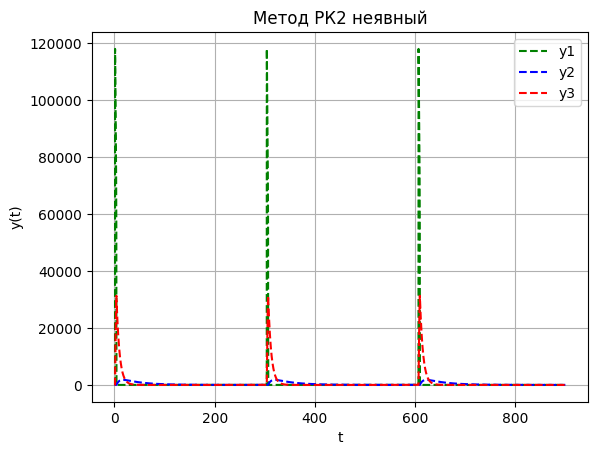

In [68]:
x, y = irk2(f, [4.0, 1.1, 4.0], 0.0, 3 * 300.0, n=300_000)

plt.title('Метод РК2 неявный')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

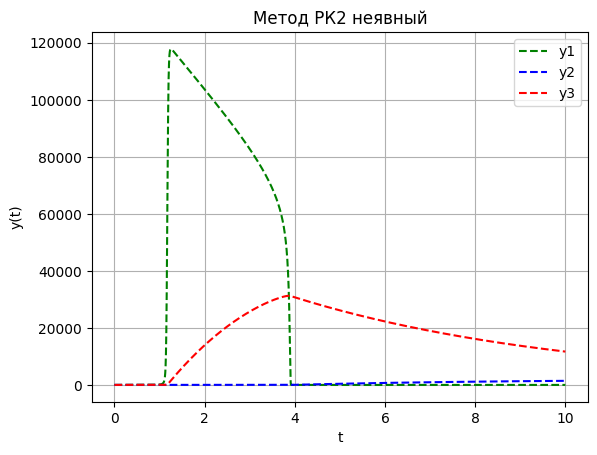

In [69]:
x, y = irk2(f, [4.0, 1.1, 4.0], 0.0, 10.0, n=100_000)

plt.title('Метод РК2 неявный')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

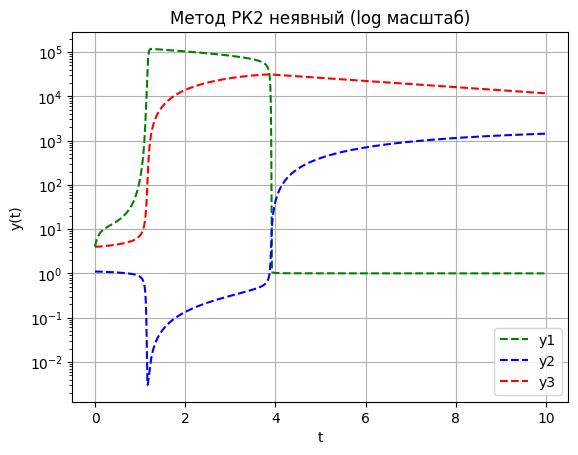

In [70]:
x, y = irk2(f, [4.0, 1.1, 4.0], 0.0, 10.0, n=100_000)

plt.title('Метод РК2 неявный (log масштаб)')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

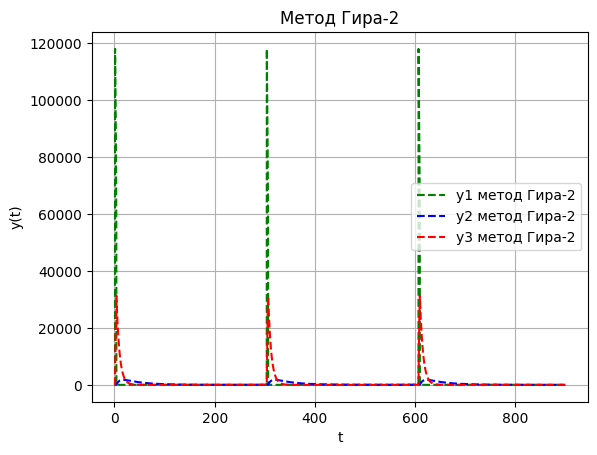

In [72]:
x, y = bdf2(f, y0=[4.0, 1.1, 4.0], a=0.0, b=3 * 300.0, n=300_000)
plt.title('Метод Гира-2')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод Гира-2')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод Гира-2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод Гира-2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

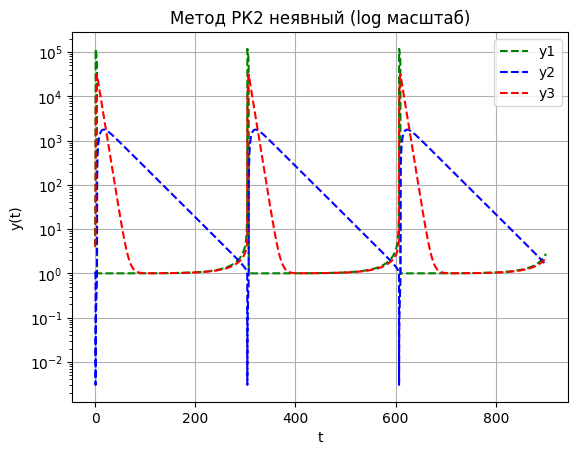

In [73]:
x, y = irk2(f, [4.0, 1.1, 4.0], 0.0, 3 * 300.0, n=300_000)

plt.title('Метод РК2 неявный (log масштаб)')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

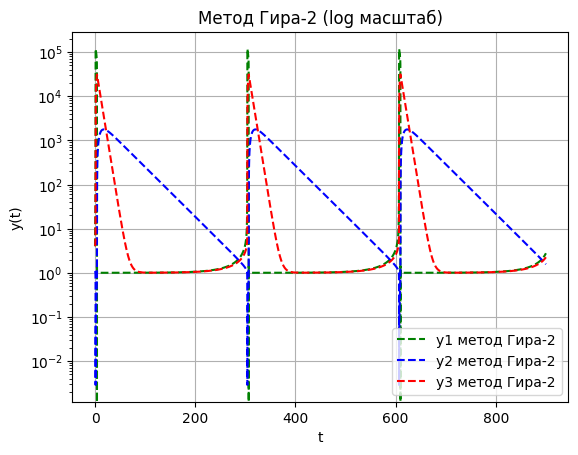

In [74]:
x, y = bdf2(f, y0=[4.0, 1.1, 4.0], a=0.0, b=3 * 300.0, n=300_000)
plt.title('Метод Гира-2 (log масштаб)')
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1 метод Гира-2')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2 метод Гира-2')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3 метод Гира-2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Методические расчеты для BDF2 (метод Гира 2) и IRK2 (неявный РК2)

In [47]:
METHOD_ORDER = {
    'euler': 1,
    'euler_recalc': 2,
    'rk4': 4,
    'ab': 4,
    'abm': 4,
    'irk2': 2,
    'bdf2': 2,
    'bdf4': 4,
}


def solve_step(f, y0, a, b, n, method):
    if method == 'euler':
        return euler(f, y0, a, b, n)
    elif method == 'euler_recalc':
        return euler_recalc(f, y0, a, b, n)
    elif method == 'rk4':
        return rk4(f, y0, a, b, n)
    elif method == 'ab':
        return ab(f, y0, a, b, n)
    elif method == 'abm':
        return abm(f, y0, a, b, n)
    elif method == 'irk2':
        return irk2(f, y0, a, b, n)
    elif method == 'bdf2':
        return bdf2(f, y0, a, b, n)
    else:
        raise ValueError(f'Неизвестный метод: {method}')


def table_runge(f, y0, a, b, method, n_start=100, k_tables=6):
    n_list = [n_start * 2 ** i for i in range(k_tables)]
    order = METHOD_ORDER[method]

    rows = []

    x1, y1 = solve_step(f, y0, a, b, n_start, method)
    x2, y2 = solve_step(f, y0, a, b, 2 * n_start, method)

    diff = y2[::2] - y1
    err_runge = np.max(np.linalg.norm(diff, ord=np.inf, axis=1)) * (2 ** order) / (2 ** order - 1)

    h = (b - a) / n_start
    rows.append([n_start, h, err_runge, None])
    prev_err_r = err_runge

    for n in n_list[1:]:
        y1 = y2.copy()
        x2, y2 = solve_step(f, y0, a, b, 2 * n, method)

        diff = y2[::2] - y1
        err_runge = np.max(np.linalg.norm(diff, ord=np.inf, axis=1)) * (2 ** order) / (2 ** order - 1)

        p = np.log2(prev_err_r / err_runge)

        h = (b - a) / n
        rows.append([n, h, err_runge, p])
        prev_err_r = err_runge
    return pd.DataFrame(rows, columns=['n', 'h', 'error_runge', 'p_runge'])

In [49]:
for m in ['irk2', 'bdf2']:
    t0 = time()
    df = table_runge(f, y0, 0.0, 5.0, m, n_start=10000, k_tables=9)
    t = time() - t0
    print(f"\nметод {m}, время: {t} с")
    print(df)


метод irk2, время: 490.58127212524414 с
         n         h  error_runge   p_runge
0    10000  0.000500    15.051864       NaN
1    20000  0.000250     3.762946  2.000008
2    40000  0.000125     0.940736  2.000002
3    80000  0.000063     0.235185  1.999993
4   160000  0.000031     0.058796  2.000006
5   320000  0.000016     0.014699  1.999996
6   640000  0.000008     0.003675  2.000073
7  1280000  0.000004     0.000918  2.000494
8  2560000  0.000002     0.000231  1.990821

метод bdf2, время: 471.31352496147156 с
         n         h  error_runge   p_runge
0    10000  0.000500    59.242103       NaN
1    20000  0.000250    14.929667  1.988441
2    40000  0.000125     3.747573  1.994154
3    80000  0.000063     0.938796  1.997073
4   160000  0.000031     0.234908  1.998716
5   320000  0.000016     0.058693  2.000836
6   640000  0.000008     0.014546  2.012539
7  1280000  0.000004     0.003379  2.106026
8  2560000  0.000002     0.000537  2.653588


метод irk2, время: 490.58127212524414 с

|     n     |     h     | error_runge | p_runge  |
|-----------|-----------|-------------|----------|
|   10000   | 0.000500  | 15.051864   |   NaN    |
|   20000   | 0.000250  | 3.762946    | 2.000008 |
|   40000   | 0.000125  | 0.940736    | 2.000002 |
|   80000   | 0.000063  | 0.235185    | 1.999993 |
|  160000   | 0.000031  | 0.058796    | 2.000006 |
|  320000   | 0.000016  | 0.014699    | 1.999996 |
|  640000   | 0.000008  | 0.003675    | 2.000073 |
| 1280000   | 0.000004  | 0.000918    | 2.000494 |
| 2560000   | 0.000002  | 0.000231    | 1.990821 |

метод bdf2, время: 471.31352496147156 с

|     n     |     h     | error_runge | p_runge  |
|-----------|-----------|-------------|----------|
|   10000   | 0.000500  | 59.242103   |   NaN    |
|   20000   | 0.000250  | 14.929667   | 1.988441 |
|   40000   | 0.000125  | 3.747573    | 1.994154 |
|   80000   | 0.000063  | 0.938796    | 1.997073 |
|  160000   | 0.000031  | 0.234908    | 1.998716 |
|  320000   | 0.000016  | 0.058693    | 2.000836 |
|  640000   | 0.000008  | 0.014546    | 2.012539 |
| 1280000   | 0.000004  | 0.003379    | 2.106026 |
| 2560000   | 0.000002  | 0.000537    | 2.653588 |

# Проверка на адекватность (подставим 0 в начальные условия)

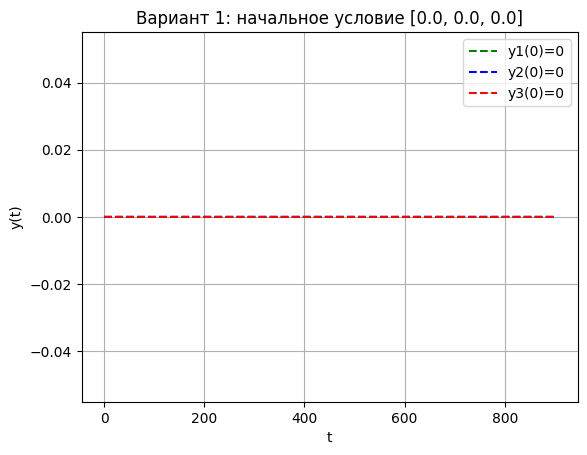

In [64]:
x, y = irk2(f, [0, 0, 0], 0.0, 3 * 300.0, n=300_000)

plt.title(f"Вариант 1: начальное условие [0.0, 0.0, 0.0]")
plt.plot(x, y[:, 0], color='green', linestyle='dashed', label='y1(0)=0')
plt.plot(x, y[:, 1], color='blue', linestyle='dashed', label='y2(0)=0')
plt.plot(x, y[:, 2], color='red', linestyle='dashed', label='y3(0)=0')
plt.xlabel("t")
plt.ylabel("y(t)")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

/var/folders/p8/g_yrlsx11n7ccfkq53h54l680000gn/T/ipykernel_29885/3506576630.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


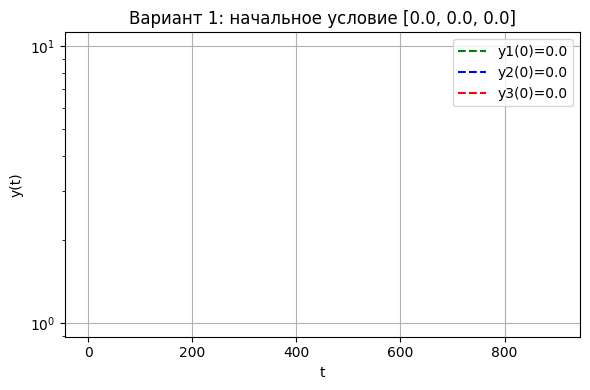

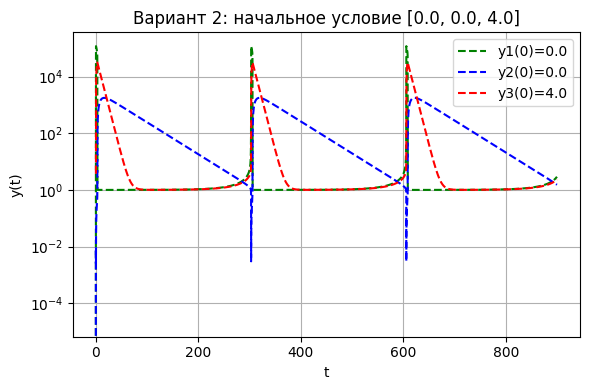

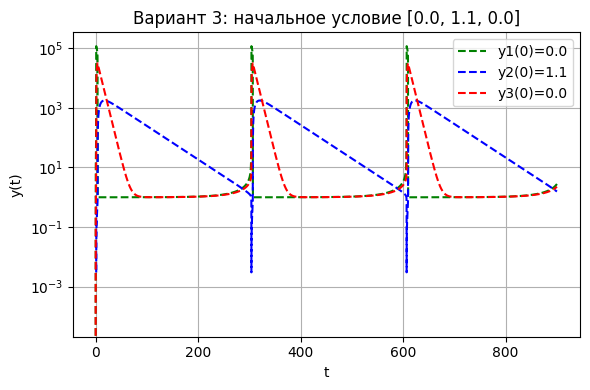

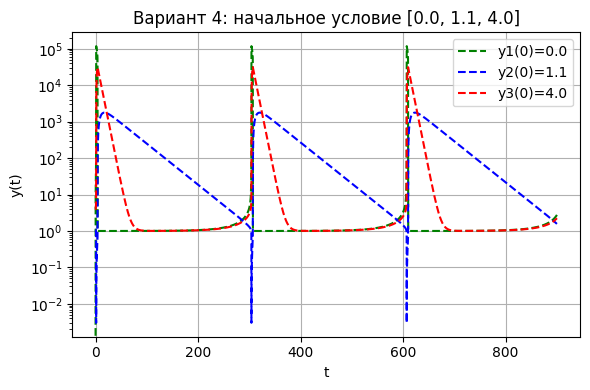

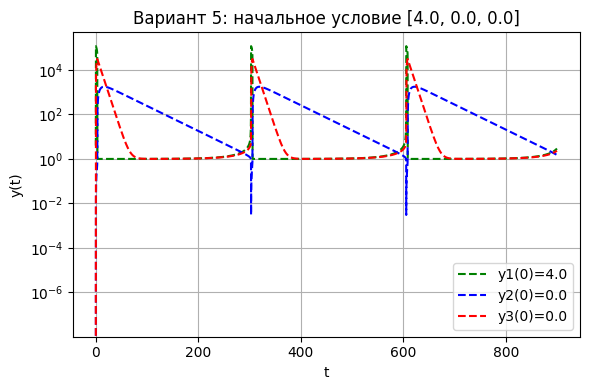

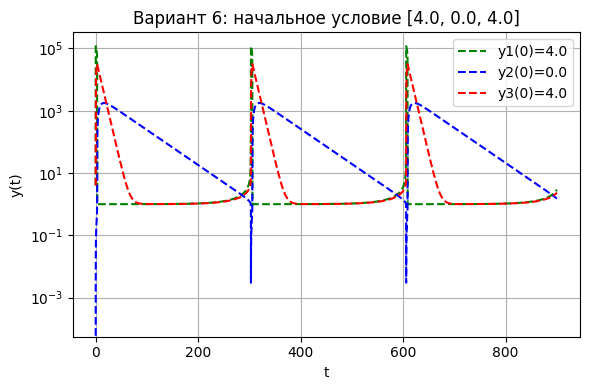

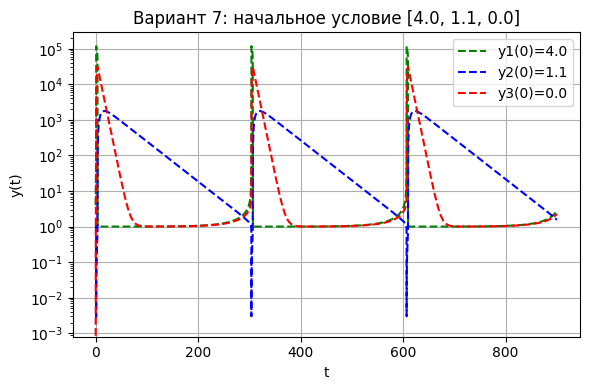

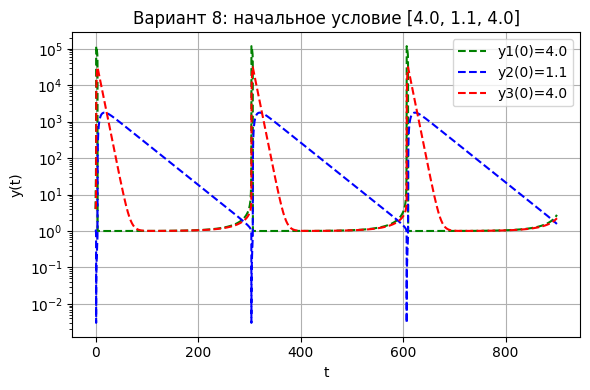

In [63]:
import numpy as np
import matplotlib.pyplot as plt


def plot_zero_y0(f, y0_start, a, b, n):
    masks = [np.array(m) for m in np.ndindex(2, 2, 2)]

    for idx, mask in enumerate(masks, start=1):
        y0 = mask * np.array(y0_start)
        x, y = irk2(f, y0.tolist(), a, b, n=n)

        plt.figure(figsize=(6, 4))
        plt.plot(x, y[:, 0],
                 color='green', linestyle='dashed',
                 label=f'y1(0)={y0[0]}')
        plt.plot(x, y[:, 1],
                 color='blue', linestyle='dashed',
                 label=f'y2(0)={y0[1]}')
        plt.plot(x, y[:, 2],
                 color='red', linestyle='dashed',
                 label=f'y3(0)={y0[2]}')
        plt.xlabel("t")
        plt.ylabel("y(t)")
        plt.yscale('log')
        plt.legend()
        plt.grid()
        plt.title(f"Вариант {idx}: начальное условие {y0.tolist()}")
        plt.tight_layout()
        plt.show()


plot_zero_y0(
    f=f,
    y0_start=[4.0, 1.1, 4.0],
    a=0.0,
    b=3 * 300.0,
    n=300_000
)

/var/folders/p8/g_yrlsx11n7ccfkq53h54l680000gn/T/ipykernel_29885/3506576630.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


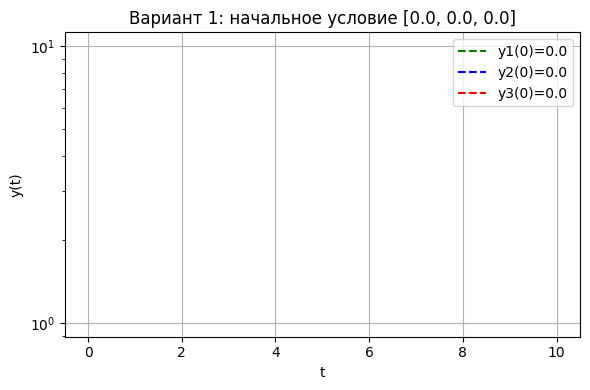

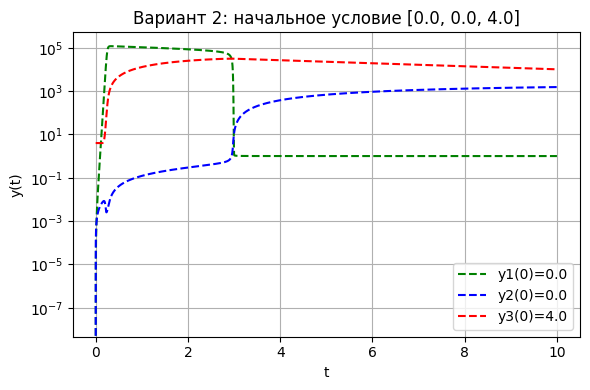

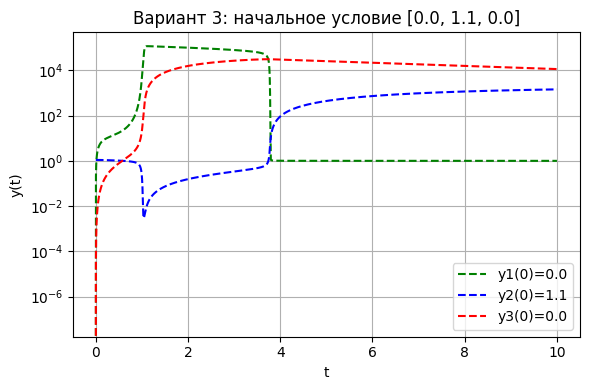

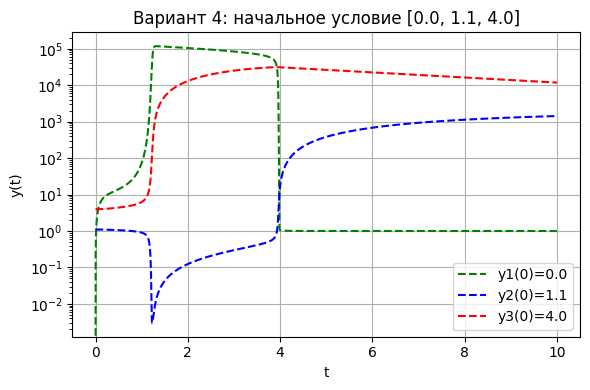

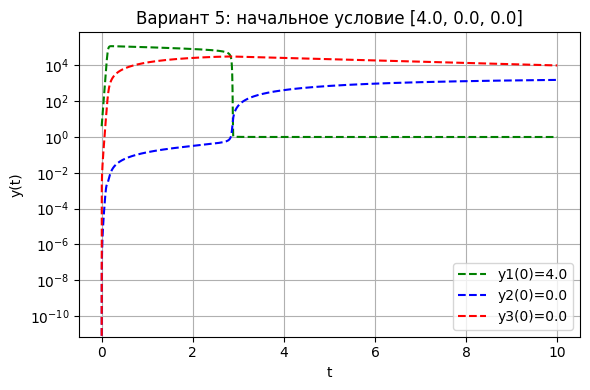

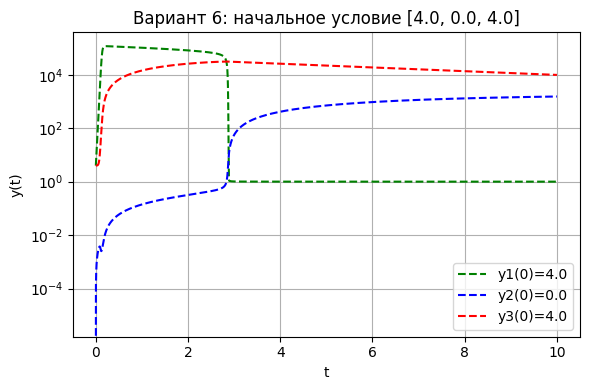

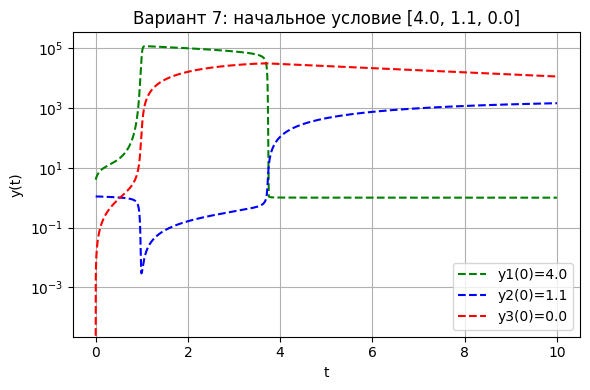

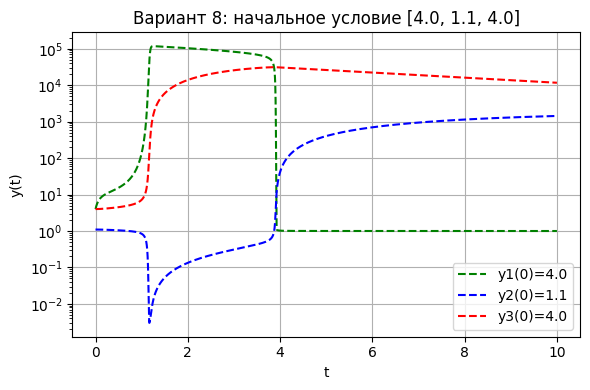

In [66]:
plot_zero_y0(
    f=f,
    y0_start=[4.0, 1.1, 4.0],
    a=0.0,
    b=10.0,
    n=100_000
)